<a href="https://colab.research.google.com/github/rayeanpatric/data_analysis/blob/master/DataScience.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data loading

In [ ]:
import pandas as pd

try:
    df = pd.read_csv('ufo_sightings_1900_2024.csv')
    print(df.shape)
    display(df.head())
    print(df.info())
    display(df.describe())
except FileNotFoundError:
    print("Error: 'ufo_sightings_1900_2024.csv' not found.")
except Exception as e:
    print(f"An error occurred: {e}")

(100000, 9)


,sighting_id,date,location,shape,duration_seconds,description,nearest_airport_distance_km,evidence,credibility_score
0,1,1965-01-15,Brazil,Orb,2209,Mysterious bright light in the sky,218,Yes,9.95
1,2,1960-02-16,Australia,Triangle,3415,Mysterious bright light in the sky,58,Yes,7.08
2,3,1966-12-10,UK,Disc,313,Mysterious bright light in the sky,325,Yes,3.36
3,4,1928-05-13,India,Unknown,1710,Mysterious bright light in the sky,93,No,7.73
4,5,1949-10-20,Brazil,Cylinder,2471,Mysterious bright light in the sky,103,No,9.47


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   sighting_id                  100000 non-null  int64  
 1   date                         100000 non-null  object 
 2   location                     100000 non-null  object 
 3   shape                        100000 non-null  object 
 4   duration_seconds             100000 non-null  int64  
 5   description                  100000 non-null  object 
 6   nearest_airport_distance_km  100000 non-null  int64  
 7   evidence                     100000 non-null  object 
 8   credibility_score            100000 non-null  float64
dtypes: float64(1), int64(3), object(5)
memory usage: 6.9+ MB
None


,sighting_id,duration_seconds,nearest_airport_distance_km,credibility_score
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,50000.500000,1802.338200,249.537260,5.497716
std,28867.657797,1038.925159,143.937339,2.590684
min,1.000000,5.000000,1.000000,1.000000
25%,25000.750000,901.000000,124.750000,3.250000
50%,50000.500000,1805.000000,250.000000,5.490000
75%,75000.250000,2702.000000,374.000000,7.740000
max,100000.000000,3599.000000,499.000000,10.000000


## Data exploration


In [ ]:
# Examine data types
print("Data Types:\n", df.dtypes)

# Analyze numerical features
print("\nSummary Statistics of Numerical Features:\n", df.describe())
#Further analysis of numerical features (e.g. distribution, outliers) will be done in the next steps.

# Investigate categorical features
for col in ['location', 'shape', 'evidence']:  # Example categorical columns
    print(f"\nUnique values and counts for '{col}':\n{df[col].value_counts()}")

# Check for missing values
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
print("\nMissing Values:\n", missing_values)
print("\nMissing Value Percentage:\n", missing_percentage)

# Identify potential relationships (basic correlation for numerical features)
numerical_cols = df.select_dtypes(include=['number']).columns
print("\nCorrelation Matrix of Numerical Features:\n", df[numerical_cols].corr())

# Additional observations and potential relationships will be explored further in subsequent steps.

Data Types:
 sighting_id                      int64
date                            object
location                        object
shape                           object
duration_seconds                 int64
description                     object
nearest_airport_distance_km      int64
evidence                        object
credibility_score              float64
dtype: object

Summary Statistics of Numerical Features:
          sighting_id  duration_seconds  nearest_airport_distance_km  \
count  100000.000000     100000.000000                100000.000000   
mean    50000.500000       1802.338200                   249.537260   
std     28867.657797       1038.925159                   143.937339   
min         1.000000          5.000000                     1.000000   
25%     25000.750000        901.000000                   124.750000   
50%     50000.500000       1805.000000                   250.000000   
75%     75000.250000       2702.000000                   374.000000   
max    100

## Data cleaning

In [ ]:
import pandas as pd

# 1. Handle Missing Values (Re-check and Impute)
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

# No missing values were found in the initial exploration, and the re-check confirms this.
# If there were missing values, the following code would be used:

# for col in df.columns:
#     if df[col].isnull().any():
#         if pd.api.types.is_numeric_dtype(df[col]):
#             df[col].fillna(df[col].median(), inplace=True)
#             print(f"Imputed missing values in '{col}' with the median.")
#         elif pd.api.types.is_object_dtype(df[col]):
#             df[col].fillna(df[col].mode()[0], inplace=True)
#             print(f"Imputed missing values in '{col}' with the mode.")
#         else:
#             print(f"Column '{col}' has missing values and is not numeric or object.")


# 2. Convert 'Date / Time' Column to datetime
try:
    df['date'] = pd.to_datetime(df['date'])
    print("Successfully converted 'date' column to datetime.")
except Exception as e:
    print(f"An error occurred during datetime conversion: {e}")
    # Attempt to infer the format
    try:
        df['date'] = pd.to_datetime(df['date'], infer_datetime_format=True)
        print("Successfully converted 'date' column to datetime using format inference.")
    except Exception as e:
        print(f"Format inference failed: {e}")


# 3. Remove Duplicate Rows
duplicate_rows = df.duplicated()
print("Number of duplicate rows:", duplicate_rows.sum())
df.drop_duplicates(inplace=True) # Drop duplicate rows
print("Number of rows after removing duplicates:", len(df))

# 4. Verify Cleaning (Re-check)
missing_values_after_cleaning = df.isnull().sum()
print("Missing Values after cleaning:\n", missing_values_after_cleaning)
print("Data types after cleaning:\n", df.dtypes)
duplicate_rows_after_cleaning = df.duplicated().sum()
print("Number of duplicate rows after cleaning:", duplicate_rows_after_cleaning)

Missing Values:
 sighting_id                    0
date                           0
location                       0
shape                          0
duration_seconds               0
description                    0
nearest_airport_distance_km    0
evidence                       0
credibility_score              0
dtype: int64
Successfully converted 'date' column to datetime.
Number of duplicate rows: 0
Number of rows after removing duplicates: 100000
Missing Values after cleaning:
 sighting_id                    0
date                           0
location                       0
shape                          0
duration_seconds               0
description                    0
nearest_airport_distance_km    0
evidence                       0
credibility_score              0
dtype: int64
Data types after cleaning:
 sighting_id                             int64
date                           datetime64[ns]
location                               object
shape                                 

## Data wrangling


In [ ]:
# Extract year, month, and day
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day

# Define duration categories
def categorize_duration(duration):
    if duration < 60:
        return 'short'
    elif duration < 300:
        return 'medium'
    else:
        return 'long'

# Apply the function to create the duration category column
df['duration_category'] = df['duration_seconds'].apply(categorize_duration)

# Optional: Daytime/Nighttime using a lambda function
# Assuming 'date' column is datetime
df['hour'] = df['date'].dt.hour
df['daytime'] = df['hour'].apply(lambda x: 'day' if 6 <= x < 18 else 'night')

## Data analysis

In [ ]:
# Calculate descriptive statistics for numerical features
numerical_features = ['year', 'month', 'day', 'duration_seconds', 'nearest_airport_distance_km', 'credibility_score', 'hour']
print("Descriptive Statistics for Numerical Features:")
display(df[numerical_features].describe())

# Calculate value counts for categorical features
categorical_features = ['location', 'shape', 'evidence', 'duration_category', 'daytime']
print("\nValue Counts for Categorical Features:")
for col in categorical_features:
    print(f"\nValue Counts for '{col}':")
    display(df[col].value_counts())

Descriptive Statistics for Numerical Features:


,year,month,day,duration_seconds,nearest_airport_distance_km,credibility_score,hour
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.0
mean,1962.058550,6.496230,14.492900,1802.338200,249.537260,5.497716,0.0
std,36.168403,3.447086,8.086818,1038.925159,143.937339,2.590684,0.0
min,1900.000000,1.000000,1.000000,5.000000,1.000000,1.000000,0.0
25%,1931.000000,4.000000,7.000000,901.000000,124.750000,3.250000,0.0
50%,1962.000000,7.000000,14.000000,1805.000000,250.000000,5.490000,0.0
75%,1994.000000,9.000000,22.000000,2702.000000,374.000000,7.740000,0.0
max,2024.000000,12.000000,28.000000,3599.000000,499.000000,10.000000,0.0



Value Counts for Categorical Features:

Value Counts for 'location':


,count
location,
China,12614
Canada,12558
India,12543
UK,12522
Brazil,12519
USA,12484
Germany,12438
Australia,12322



Value Counts for 'shape':


,count
shape,
Triangle,20290
Disc,20180
Unknown,19905
Orb,19869
Cylinder,19756



Value Counts for 'evidence':


,count
evidence,
No,50075
Yes,49925



Value Counts for 'duration_category':


,count
duration_category,
long,91647
medium,6816
short,1537



Value Counts for 'daytime':


,count
daytime,
night,100000


## Data visualization

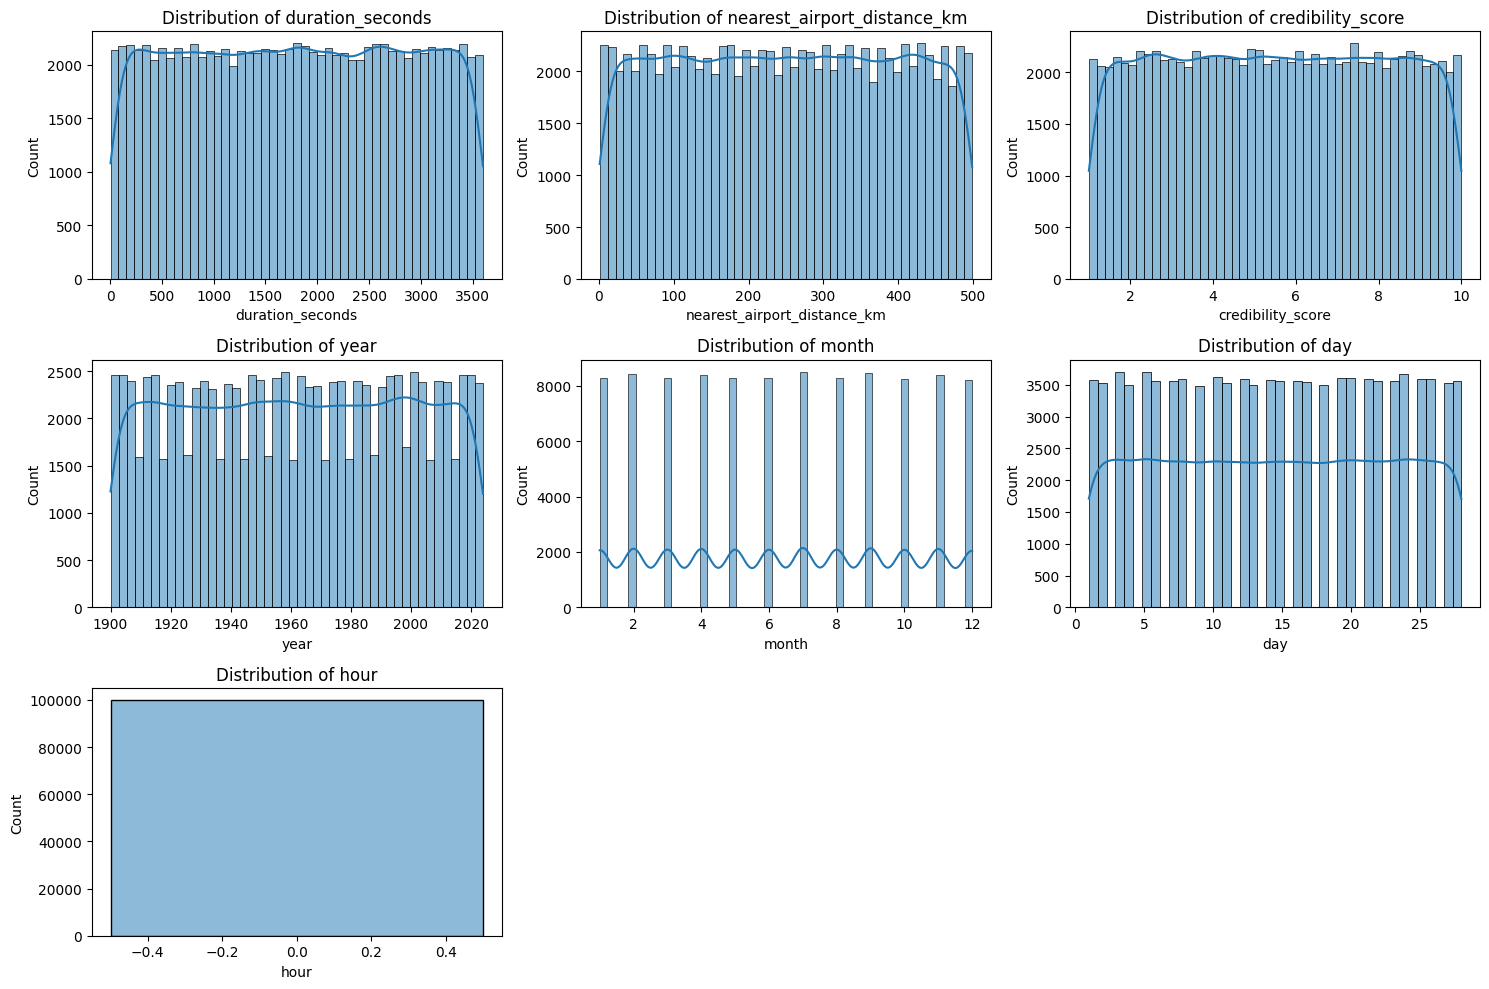

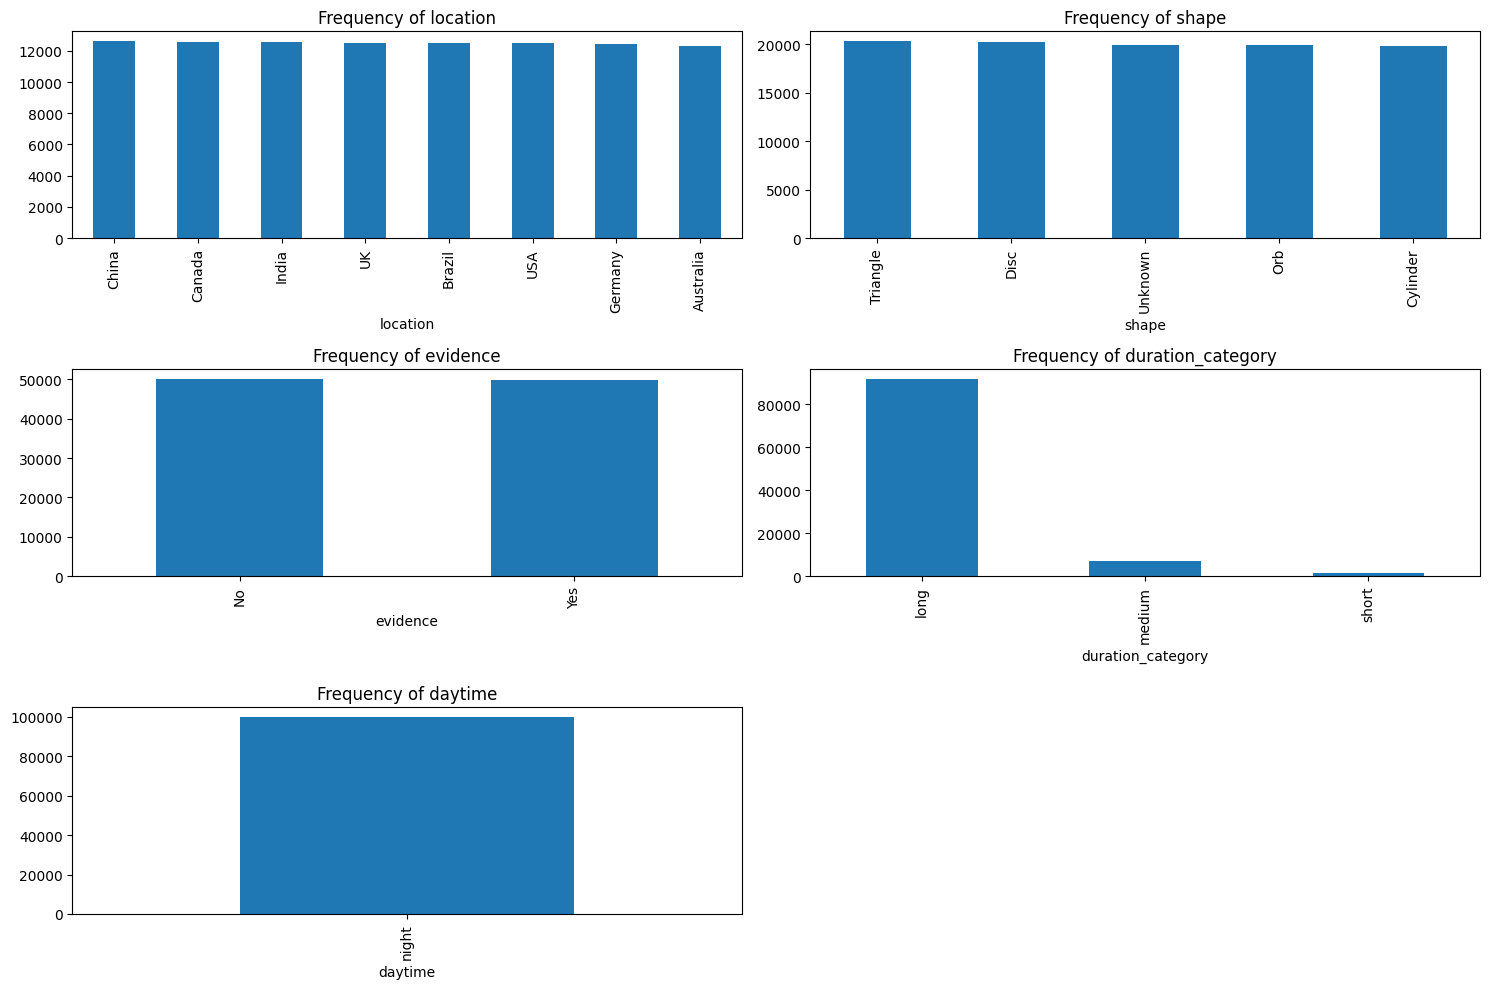

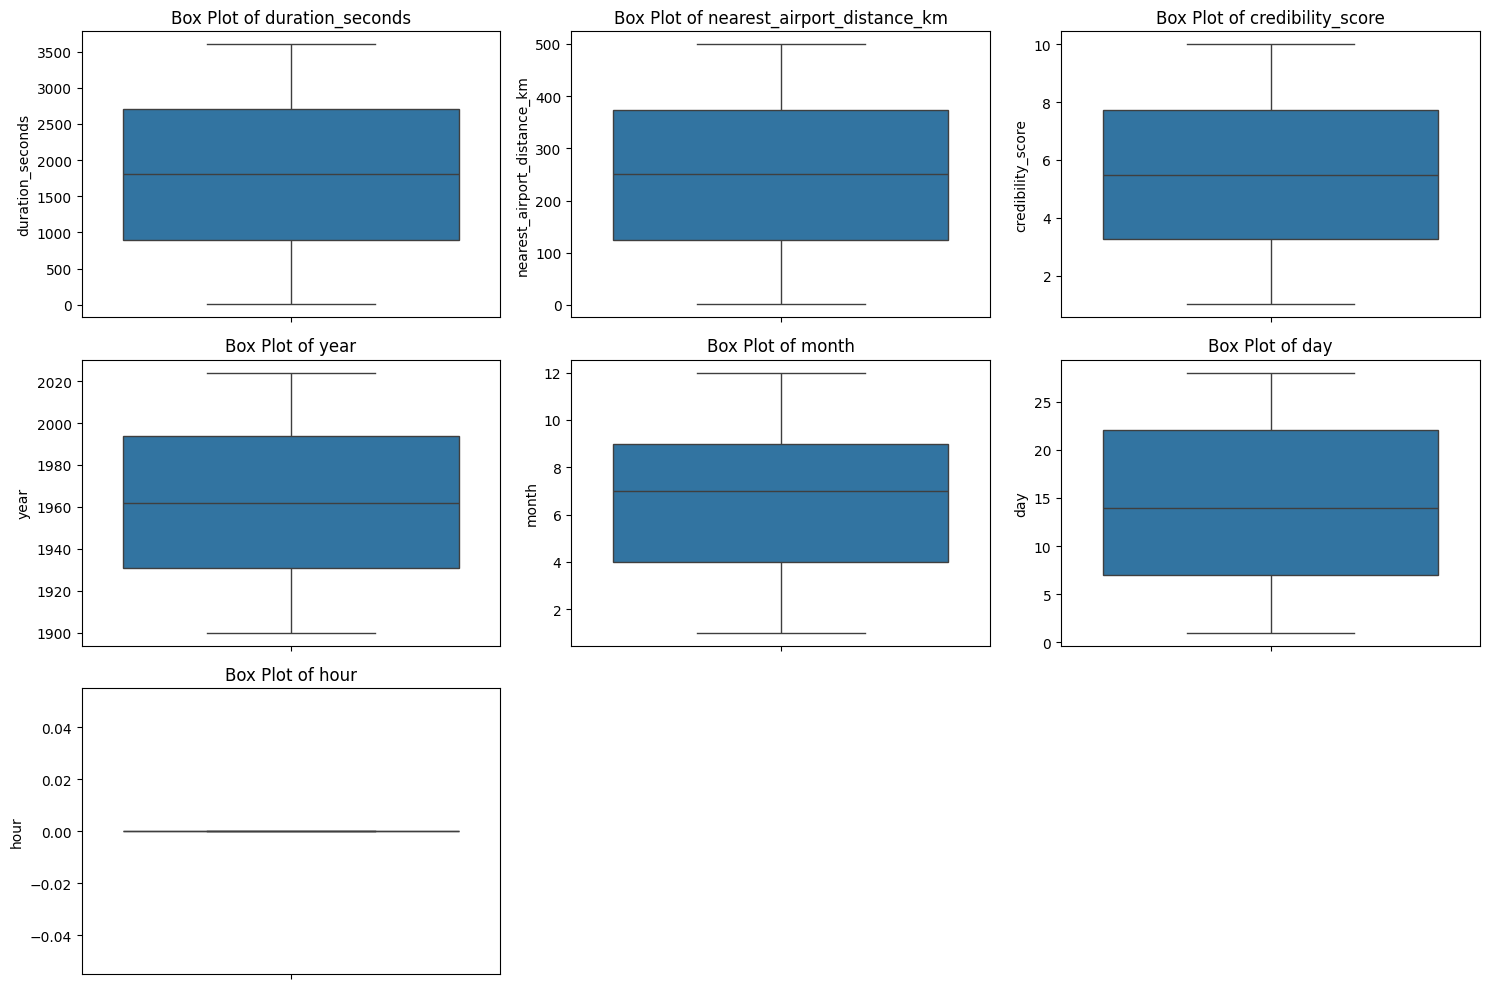

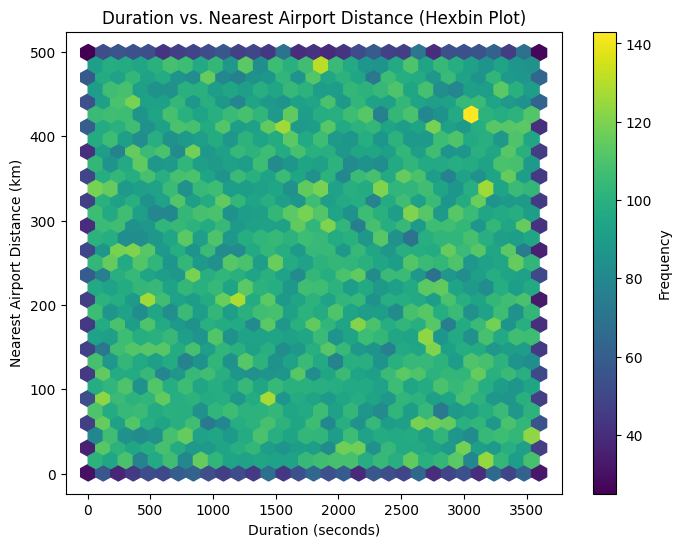

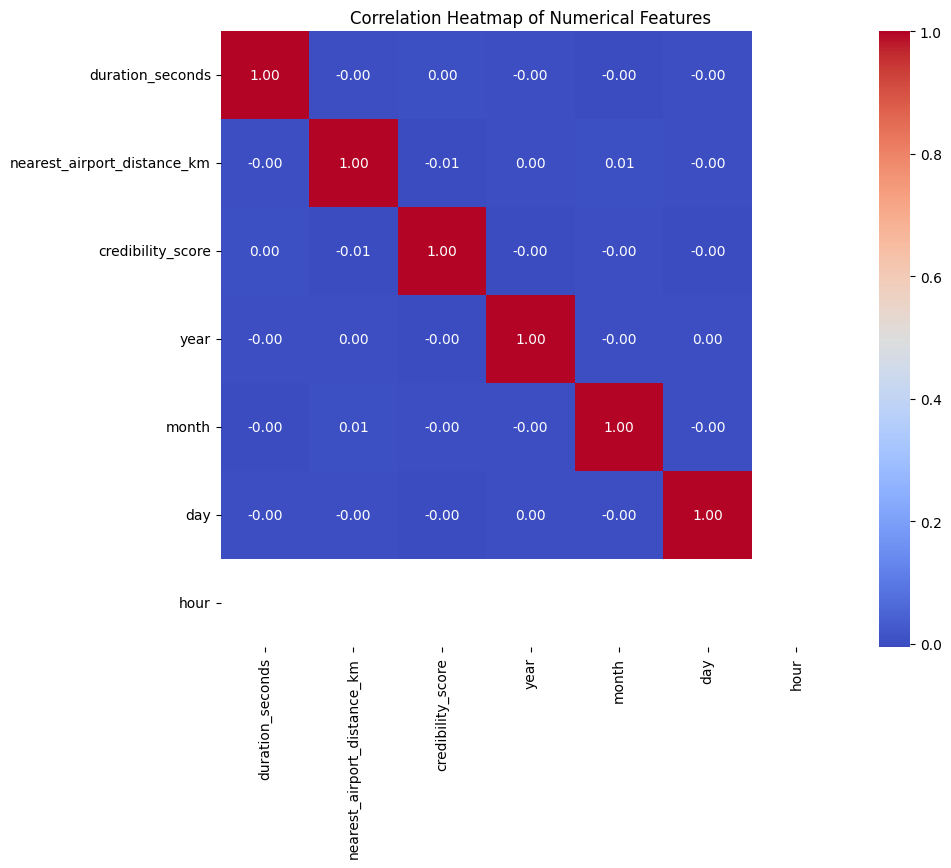

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms/Density Plots for Numerical Features
plt.figure(figsize=(15, 10))
numerical_features = ['duration_seconds', 'nearest_airport_distance_km', 'credibility_score', 'year', 'month', 'day', 'hour']
for i, col in enumerate(numerical_features):
    plt.subplot(3, 3, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

# Bar Plots for Categorical Features
plt.figure(figsize=(15, 10))
categorical_features = ['location', 'shape', 'evidence', 'duration_category', 'daytime']
for i, col in enumerate(categorical_features):
    plt.subplot(3, 2, i + 1)
    df[col].value_counts().plot(kind='bar')
    plt.title(f'Frequency of {col}')
plt.tight_layout()
plt.show()

# Box Plots for Outlier Detection
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_features):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(y=df[col])
    plt.title(f'Box Plot of {col}')
plt.tight_layout()
plt.show()

# Scatter Plots (or Hexbin/2D Histograms) for Numerical Relationships
plt.figure(figsize=(8, 6))
plt.hexbin(df['duration_seconds'], df['nearest_airport_distance_km'], gridsize=30, cmap='viridis')
plt.xlabel('Duration (seconds)')
plt.ylabel('Nearest Airport Distance (km)')
plt.title('Duration vs. Nearest Airport Distance (Hexbin Plot)')
plt.colorbar(label='Frequency')
plt.show()

# Correlation Heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = df[numerical_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features')
plt.show()